### Devo aggiustare per provare con notebook e local map

In [27]:
import sys
sys.path.append('/home/biso/development/my_projects/remap')
import openrouteservice
from backend.app.core.config import OPENROUTE_API_KEY



ors_client = openrouteservice.Client(key=OPENROUTE_API_KEY)


def geocode_address(address: str):
    geocode_result = ors_client.pelias_search(text=address, country='IT')
    if geocode_result and 'features' in geocode_result and len(geocode_result['features']) > 0:
        coords = geocode_result['features'][0]['geometry']['coordinates']
        return tuple(coords)
    else:
        raise ValueError(f"Could not geocode address: {address}")



def get_route(coords, profile, radiuses=[1000, 1000]):
    return ors_client.directions(coordinates=coords, profile=profile, radiuses=radiuses, format='geojson')

print(geocode_address("Prato della Valle, Padua, Italy"))


(11.878668, 45.396973)


In [9]:
from geopy.geocoders import Nominatim

def geocode_address(address: str):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(address)
    if location:
        return (location.longitude, location.latitude)
    else:
        raise ValueError(f"Could not geocode address: {address}")

print(geocode_address("Padua"))


(11.8734455, 45.4077172)


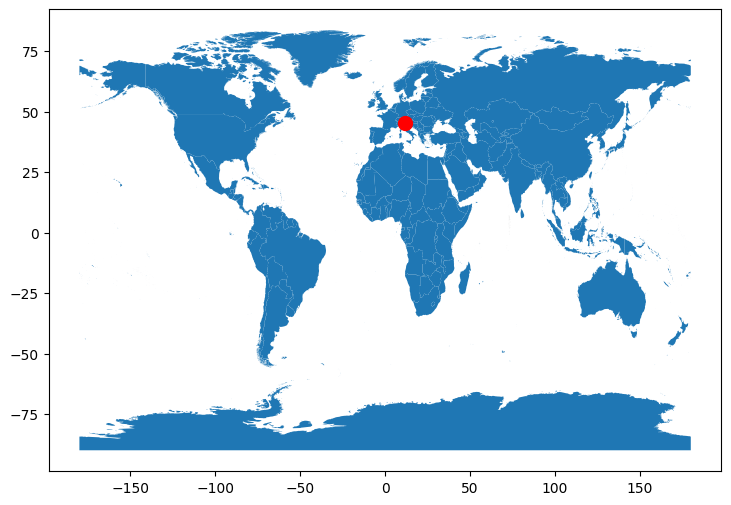

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data = {'City': ['Padova'], 'Latitude': [45.4064], 'Longitude': [11.8768]}
df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, color='red', marker='o', markersize=100)

plt.show()
